In [7]:
import drawwithplt as Dplt
from drawwithplt import plt
Dplt.plt.style.use(["science", "grid"])

import numpy as np
import pandas as pd
import copy
import pickle as pkl

In [3]:
# 读取CSV文件
df = pd.read_csv('Data/TrafficNet/地名地址信息;交通地名;路口名.csv')

# 显示前几行数据以检查
df[56:58]


c:\Users\LIFTES-NONET\Anaconda3\envs\py3.7\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pcode,type,gridcode,typecode,citycode,adname,id,address,adcode,pname,...,name,location,longitude_gcj02,latitude_gcj02,longitude_wgs84,latitude_wgs84,typecode_single,大类,中类,小类
56,110000,地名地址信息;交通地名;路口名,5915347902,190302,10,房山区,B0FFHPLCIS,房山区,110111,北京市,...,七孤路与涞宝路交叉口,"115.623374,39.643195",115.623374,39.643195,115.617340,39.642192,190302,地名地址信息,交通地名,路口名
57,110000,地名地址信息;交通地名;路口名,5915356011,190302,10,房山区,B0FFHPGTJA,房山区,110111,北京市,...,六石路与涞宝路交叉口,"115.632419,39.638776",115.632419,39.638776,115.626375,39.637763,190302,地名地址信息,交通地名,路口名


In [16]:
def plot_points_within_bounds(df, long_min=None, long_max=None, lat_min=None, lat_max=None):
    """
    根据指定的经纬度范围，绘制图中的点。如果没有指定范围，就使用数据的最小和最大值。
    
    参数:
    - df: DataFrame，包含经纬度信息的数据
    - long_min, long_max: 经度的最小和最大值
    - lat_min, lat_max: 纬度的最小和最大值
    """
    # 如果没有指定范围，则使用数据的最小和最大值
    if long_min is None:
        long_min = df['longitude_gcj02'].min()
    if long_max is None:
        long_max = df['longitude_gcj02'].max()
    if lat_min is None:
        lat_min = df['latitude_gcj02'].min()
    if lat_max is None:
        lat_max = df['latitude_gcj02'].max()

    # 根据指定的经纬度范围过滤数据
    df_filtered = df[(df['longitude_gcj02'] >= long_min) & 
                     (df['longitude_gcj02'] <= long_max) & 
                     (df['latitude_gcj02'] >= lat_min) & 
                     (df['latitude_gcj02'] <= lat_max)]
    
    # 添加额外的空间，确保点不会紧贴图像边缘
    padding_long = (long_max - long_min) * 0.05
    padding_lat = (lat_max - lat_min) * 0.05
    
    # 绘制图形
    plt.figure(figsize=(5, 5))
    plt.scatter(df_filtered['longitude_gcj02'], df_filtered['latitude_gcj02'], s=5, color='blue')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.xlim(long_min - padding_long, long_max + padding_long)  # 设置x轴范围
    plt.ylim(lat_min - padding_lat, lat_max + padding_lat)   # 设置y轴范围


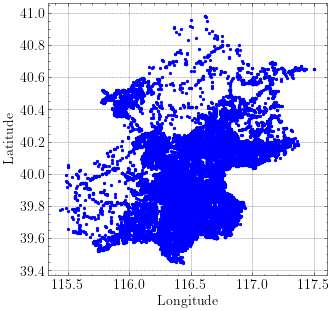

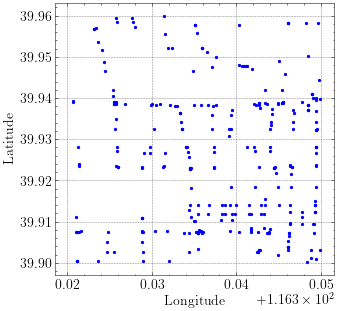

In [20]:
plot_points_within_bounds(df)
plot_points_within_bounds(df,116.32,116.35,39.90,39.96)

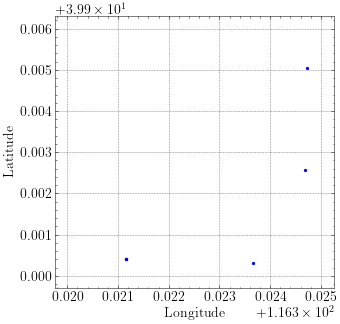

In [21]:
plot_points_within_bounds(df,116.32,116.325,39.90,39.906)

In [3]:
import requests
import math

import math

def haversine_distance(origin, destination):
    """
    使用Haversine公式计算两点间的距离。
    返回的距离单位为米。
    """
    # 地球半径，单位为米
    R = 6371000
    lat1, lon1 = math.radians(origin[1]), math.radians(origin[0])
    lat2, lon2 = math.radians(destination[1]), math.radians(destination[0])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = (math.sin(dlat / 2) ** 2 +
         math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2)
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return R * c


def is_adjacent(origin, destination, threshold=1.1):
    """
    使用API导航来判断两个路口是否相邻。
    如果导航路径等于或略大于两点间的直线距离，则判断两者间有道路连接。
    """
    # 这里使用高德API作为示例
    api_url = "https://restapi.amap.com/v3/direction/walking?origin={},{}&destination={},{}&key=feac9a525ffa71a7f5d2a035bf2e0b1c"
    response = requests.get(api_url.format(origin[0], origin[1], destination[0], destination[1]))
    data = response.json()
    
    print(data)

    # 计算导航距离
    nav_distance = data['route']['paths'][0]['distance']
    
    # 计算两点间的直线距离
    straight_distance = haversine_distance(origin, destination)
    
    print(nav_distance, straight_distance)

    return float(nav_distance) <= straight_distance * threshold

def get_direction(origin, destination):
    """
    通过经纬度计算两点间连线的tan值，来判断道路是东西连接还是南北连接。
    """
    delta_x = destination[0] - origin[0]
    delta_y = destination[1] - origin[1]
    
    # 计算tan值
    tan_value = abs(delta_y / delta_x)
    
    # 判断方向
    if tan_value > 1:
        return "南北方向"
    else:
        return "东西方向"

# 使用示例
origin = (116.397570, 39.908821)
destination = (116.398570, 39.908821)
if is_adjacent(origin, destination):
    print("两点相邻")
    print("方向:", get_direction(origin, destination))


{'status': '1', 'info': 'ok', 'infocode': '10000', 'count': '1', 'route': {'origin': '116.39757,39.908821', 'destination': '116.39857,39.908821', 'paths': [{'distance': '1005', 'duration': '804', 'steps': [{'instruction': '向北步行437米右转', 'orientation': '北', 'road': [], 'distance': '437', 'duration': '350', 'polyline': '116.397457,39.908815;116.397387,39.910373;116.397387,39.910373;116.397348,39.911211;116.397348,39.911211;116.397287,39.912604;116.397287,39.912604;116.397279,39.912765', 'action': '右转', 'assistant_action': [], 'walk_type': '0'}, {'instruction': '沿东华门路向东步行103米右转', 'orientation': '东', 'road': '东华门路', 'distance': '103', 'duration': '82', 'polyline': '116.397274,39.912765;116.397947,39.912773;116.397947,39.912773;116.398216,39.912786;116.398216,39.912786;116.398368,39.912778;116.398368,39.912778;116.398511,39.912773', 'action': '右转', 'assistant_action': [], 'walk_type': '0'}, {'instruction': '向南步行336米左转', 'orientation': '南', 'road': [], 'distance': '336', 'duration': '269', 'p